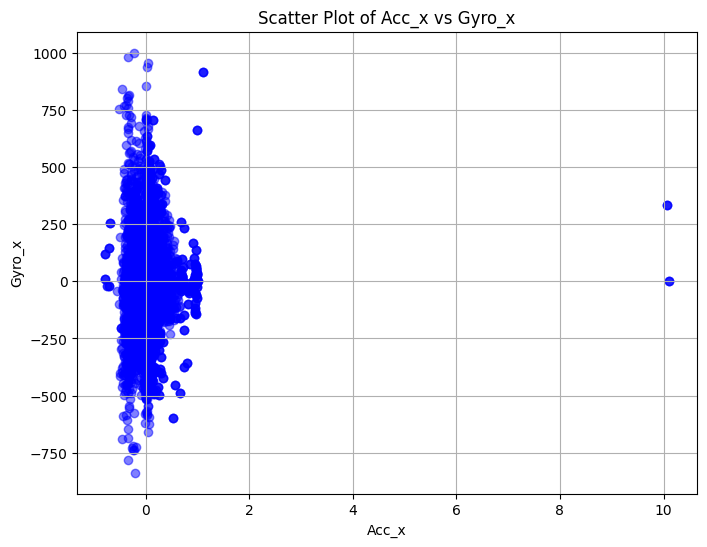

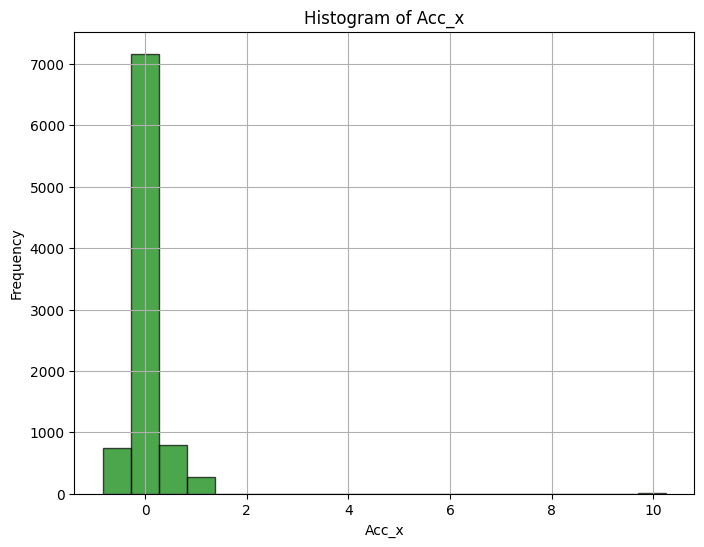

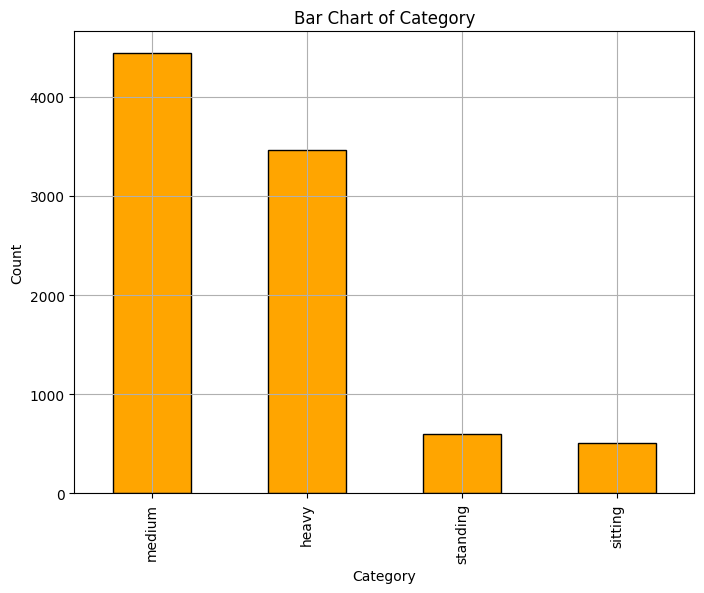

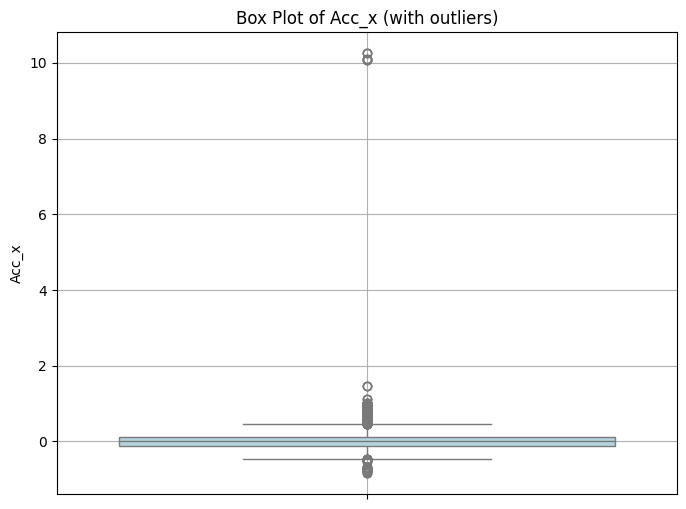

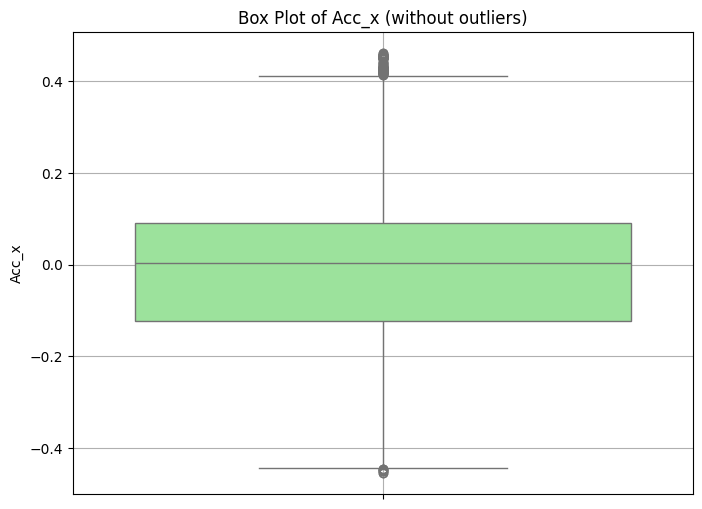

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to load the dataset
def load_dataset(file_path):
    try:
        data = pd.read_csv(file_path, 
                           delimiter=';',
                           decimal='.',  
                           na_values=['NaN', 'NA', '', ' '], 
                           low_memory=False)  
        
        # Convert relevant columns to numeric
        numeric_columns = ['Acc_x', 'Acc_y', 'Acc_z', 'Gyro_x', 'Gyro_y', 'Gyro_z', 'Set']
        for column in numeric_columns:
            data[column] = pd.to_numeric(data[column], errors='coerce')
        
        return data
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None

# Function to generate a scatter plot
def scatter_plot(data, attr_x, attr_y):
    """
    Generate a scatter plot for a pair of attributes (attr_x, attr_y).
    """
    if attr_x in data.columns and attr_y in data.columns:
        plt.figure(figsize=(8, 6))
        plt.scatter(data[attr_x], data[attr_y], alpha=0.5, color='blue')
        plt.title(f'Scatter Plot of {attr_x} vs {attr_y}')
        plt.xlabel(attr_x)
        plt.ylabel(attr_y)
        plt.grid(True)
        plt.show()
    else:
        print(f"One or both attributes not found: {attr_x}, {attr_y}")

# Function to generate a histogram for continuous attributes
def histogram(data, attribute):
    """
    Generate a histogram for the given attribute.
    """
    if attribute in data.columns:
        plt.figure(figsize=(8, 6))
        plt.hist(data[attribute].dropna(), bins=20, color='green', edgecolor='black', alpha=0.7)
        plt.title(f'Histogram of {attribute}')
        plt.xlabel(attribute)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
    else:
        print(f"Attribute '{attribute}' not found in the dataset.")

# Function to generate a bar chart for categorical attributes
def bar_chart(data, attribute):
    """
    Generate a bar chart for the given categorical attribute.
    """
    if attribute in data.columns:
        plt.figure(figsize=(8, 6))
        data[attribute].value_counts().plot(kind='bar', color='orange', edgecolor='black')
        plt.title(f'Bar Chart of {attribute}')
        plt.xlabel(attribute)
        plt.ylabel('Count')
        plt.grid(True)
        plt.show()
    else:
        print(f"Attribute '{attribute}' not found in the dataset.")

# Function to generate a box plot with outliers
def box_plot_with_outliers(data, attribute):
    """
    Generate a box plot for the given attribute, including outliers.
    """
    if attribute in data.columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data[attribute], color='lightblue')
        plt.title(f'Box Plot of {attribute} (with outliers)')
        plt.grid(True)
        plt.show()
    else:
        print(f"Attribute '{attribute}' not found in the dataset.")

# Function to generate a box plot without outliers
def box_plot_without_outliers(data, attribute):
    """
    Generate a box plot for the given attribute, excluding outliers.
    """
    if attribute in data.columns:
        Q1 = data[attribute].quantile(0.25)
        Q3 = data[attribute].quantile(0.75)
        IQR = Q3 - Q1
        
        # Filtering data to exclude outliers
        data_no_outliers = data[(data[attribute] >= (Q1 - 1.5 * IQR)) & (data[attribute] <= (Q3 + 1.5 * IQR))]
        
        plt.figure(figsize=(8, 6))
        sns.boxplot(data_no_outliers[attribute], color='lightgreen')
        plt.title(f'Box Plot of {attribute} (without outliers)')
        plt.grid(True)
        plt.show()
    else:
        print(f"Attribute '{attribute}' not found in the dataset.")

# Main function to demonstrate the visualizations
def main():
    file_path = r'D:\M2\DataMining\TP1\DatasetExos.csv'  
    data = load_dataset(file_path)
    
    if data is not None:
        # Scatter plot for Acc_x vs Gyro_x
        scatter_plot(data, 'Acc_x', 'Gyro_x')
        
        # Histogram for Acc_x
        histogram(data, 'Acc_x')
        
        # Bar chart for Category instead of Exercise
        bar_chart(data, 'Category')  # Changed to 'Category'
        
        # Box plot with and without outliers for Acc_x
        box_plot_with_outliers(data, 'Acc_x')
        box_plot_without_outliers(data, 'Acc_x')

if __name__ == "__main__":
    main()


Before Normalization:
Acc_x: Min = -0.8380000000000001, Max = 10.255
Acc_y: Min = -15.455, Max = 16.205
Acc_z: Min = -0.6193333333333334, Max = 10.175
Gyro_x: Min = -837.074, Max = 999.512
Gyro_y: Min = -995.854, Max = 973.538
Gyro_z: Min = -988.294, Max = 862.928
Set: Min = -10.0, Max = 2000.0

After Normalization:
Acc_x: Min = 0.0, Max = 1.0
Acc_y: Min = 0.0, Max = 1.0
Acc_z: Min = 0.0, Max = 1.0
Gyro_x: Min = 0.0, Max = 1.0
Gyro_y: Min = 0.0, Max = 1.0
Gyro_z: Min = 0.0, Max = 1.0
Set: Min = 0.0, Max = 1.0

Normalized Data Preview:
                    ep (ms)     Acc_x     Acc_y     Acc_z    Gyro_x    Gyro_y  \
0  2019-01-11 15:08:05.200  0.076760  0.519015  0.050798       NaN       NaN   
1  2019-01-11 15:08:05.400  0.075408  0.518809  0.050011  0.446616  0.505214   
2  2019-01-11 15:08:05.600  0.075663  0.518846  0.051416       NaN  0.505536   
3  2019-01-11 15:08:05.800  0.073380  0.518383  0.050567  0.460166  0.482692   
4  2019-01-11 15:08:06.000  0.073019  0.518404  0.046722  

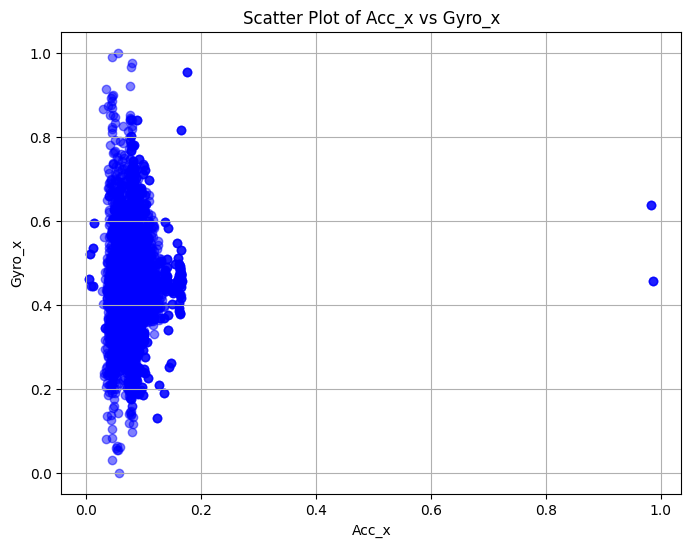

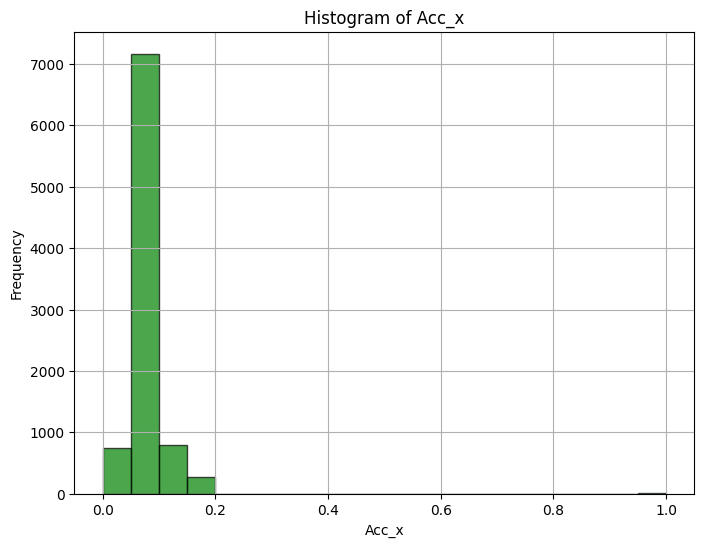

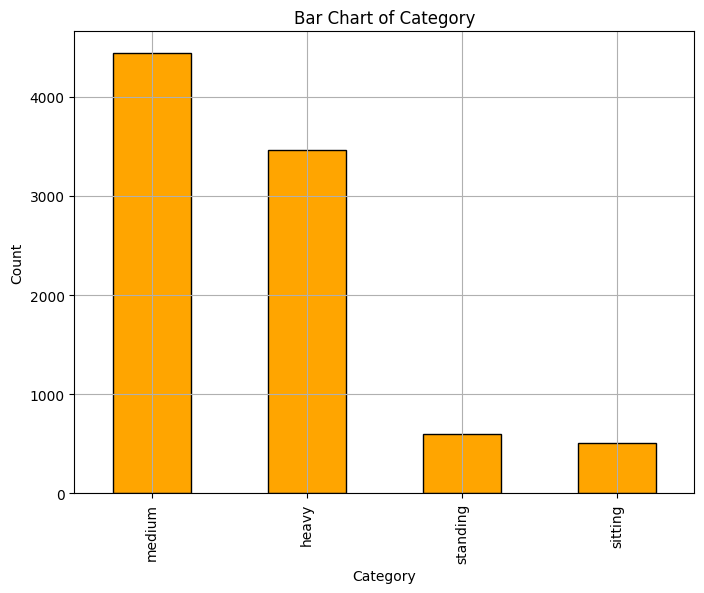

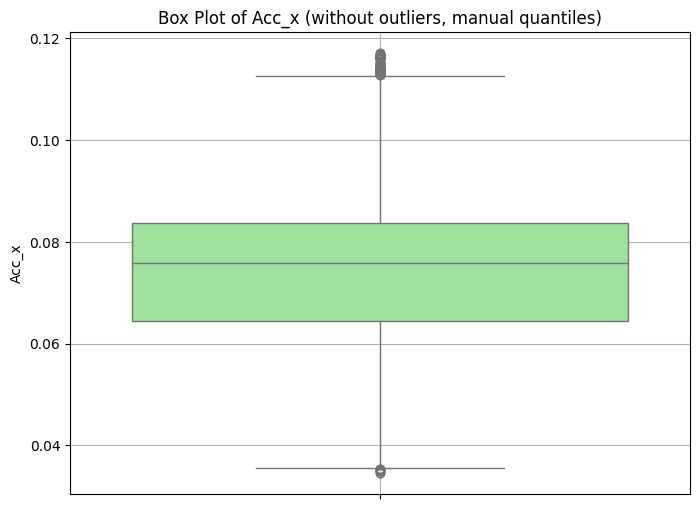

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to load and normalize the dataset manually
def load_and_normalize_dataset(file_path):

    try:
        
        data = pd.read_csv(file_path, 
                           delimiter=';', 
                           decimal='.',  
                           na_values=['NaN', 'NA', '', ' '], 
                           low_memory=False)  
        
        numeric_columns = ['Acc_x', 'Acc_y', 'Acc_z', 'Gyro_x', 'Gyro_y', 'Gyro_z', 'Set']
        for column in numeric_columns:
            data[column] = pd.to_numeric(data[column], errors='coerce')
        
    
        print("Before Normalization:")
        for column in numeric_columns:
            print(f"{column}: Min = {data[column].min()}, Max = {data[column].max()}")
        
        # Manually normalize all numeric columns using Min-Max scaling
        for column in numeric_columns:
            col_min = data[column].min()
            col_max = data[column].max()
            data[column] = (data[column] - col_min) / (col_max - col_min)
        
        print("\nAfter Normalization:")
        for column in numeric_columns:
            print(f"{column}: Min = {data[column].min()}, Max = {data[column].max()}")
        
        return data
    except Exception as e:
        print(f"Error loading or normalizing dataset: {e}")
        return None

# Function to generate a scatter plot
def scatter_plot(data, attr_x, attr_y):
    """
    Generate a scatter plot for a pair of attributes (attr_x, attr_y).
    """
    if attr_x in data.columns and attr_y in data.columns:
        plt.figure(figsize=(8, 6))
        plt.scatter(data[attr_x], data[attr_y], alpha=0.5, color='blue')
        plt.title(f'Scatter Plot of {attr_x} vs {attr_y}')
        plt.xlabel(attr_x)
        plt.ylabel(attr_y)
        plt.grid(True)
        plt.show()
    else:
        print(f"One or both attributes not found: {attr_x}, {attr_y}")

# Function to generate a histogram for continuous attributes
def histogram(data, attribute):
    """
    Generate a histogram for the given attribute.
    """
    if attribute in data.columns:
        plt.figure(figsize=(8, 6))
        plt.hist(data[attribute].dropna(), bins=20, color='green', edgecolor='black', alpha=0.7)
        plt.title(f'Histogram of {attribute}')
        plt.xlabel(attribute)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
    else:
        print(f"Attribute '{attribute}' not found in the dataset.")

# Function to generate a bar chart for categorical attributes
def bar_chart(data, attribute):
    """
    Generate a bar chart for the given categorical attribute.
    """
    if attribute in data.columns:
        plt.figure(figsize=(8, 6))
        data[attribute].value_counts().plot(kind='bar', color='orange', edgecolor='black')
        plt.title(f'Bar Chart of {attribute}')
        plt.xlabel(attribute)
        plt.ylabel('Count')
        plt.grid(True)
        plt.show()
    else:
        print(f"Attribute '{attribute}' not found in the dataset.")

# Function to calculate quantiles manually
def calculate_quantiles(data, attribute):
    """
    Manually calculate Q1 and Q3 quantiles for a given attribute.
    """
    sorted_data = data[attribute].dropna().sort_values() 
    n = len(sorted_data)
    
    Q1_position = (n + 1) / 4
    Q3_position = 3 * (n + 1) / 4
    
    # Interpolate to find Q1 and Q3
    Q1 = sorted_data.iloc[int(Q1_position) - 1] + (sorted_data.iloc[int(Q1_position)] - sorted_data.iloc[int(Q1_position) - 1]) * (Q1_position % 1)
    Q3 = sorted_data.iloc[int(Q3_position) - 1] + (sorted_data.iloc[int(Q3_position)] - sorted_data.iloc[int(Q3_position) - 1]) * (Q3_position % 1)
    
    return Q1, Q3

# Function to generate a box plot without outliers using manual quantiles
def box_plot_without_outliers_manual(data, attribute):
    """
    Generate a vertical box plot for the given attribute, excluding outliers, using manually calculated quantiles.
    """
    if attribute in data.columns:
        Q1, Q3 = calculate_quantiles(data, attribute)  # Manual quantile calculation
        IQR = Q3 - Q1
        
        # Filtering data to exclude outliers
        data_no_outliers = data[(data[attribute] >= (Q1 - 1.5 * IQR)) & (data[attribute] <= (Q3 + 1.5 * IQR))]
        
        plt.figure(figsize=(8, 6))
        sns.boxplot(y=data_no_outliers[attribute], color='lightgreen')  # Corrected to vertical orientation
        plt.title(f'Box Plot of {attribute} (without outliers, manual quantiles)')
        plt.grid(True)
        plt.show()
    else:
        print(f"Attribute '{attribute}' not found in the dataset.")

# Main function to demonstrate the visualizations
def main():
    file_path = r'D:\M2\DataMining\TP1\DatasetExos.csv'  # Path to your dataset
    data = load_and_normalize_dataset(file_path)  # Load and normalize the dataset
    
    if data is not None:
        # Explicitly use the normalized data for visualization
        print("\nNormalized Data Preview:\n", data.head())  # Ensure we're using normalized data
        
        # Scatter plot for normalized Acc_x vs normalized Gyro_x
        scatter_plot(data, 'Acc_x', 'Gyro_x')  # Use normalized values
        
        # Histogram for normalized Acc_x
        histogram(data, 'Acc_x')  # Use normalized values
        
        # Bar chart for Category instead of Exercise
        bar_chart(data, 'Category')  # Changed to 'Category'
        
        # Box plot with and without outliers for normalized Acc_x
        box_plot_without_outliers_manual(data, 'Acc_x')

if __name__ == "__main__":
    main()


In [9]:
import pandas as pd

# Example dataset: Student scores
data = {
    'Scores': [90, 85, 76, 88, 92, 95, 80, 78, 84, 91]
}

df = pd.DataFrame(data)

# Display the DataFrame
print(df)


   Scores
0      90
1      85
2      76
3      88
4      92
5      95
6      80
7      78
8      84
9      91


In [22]:
sorted_data = df['Scores'].dropna().sort_values()
print(sorted_data)
print('\n')
n = len(sorted_data)

print('len is : ',n)

Q1_position = (n + 1) / 4
Q3_position = 3 * (n + 1) / 4

print('\n')
print('Q1_position = ',int(Q1_position))
print('Q3_position = ',int(Q3_position))

print('\n')
Q1_position11 = Q1_position % 1
print('Q1_position11 = ',Q1_position11)

2    76
7    78
6    80
8    84
1    85
3    88
0    90
9    91
4    92
5    95
Name: Scores, dtype: int64


len is :  10


Q1_position =  2
Q3_position =  8


Q1_position11 =  0.75
